# Linear Regression - BoomBikes (Bikes Sharing)
## Table Of Contents
1. Importing Libraries and Dataset
2. Data Understanding
3. Variables Inspection (EDA)
4. Data Preparation
5. Model Building
6. Model Evaluation (Assumptions Check)
7. Model Testing
8. Model Inference

### 1. Importing the Libraries and the Dataset

In [1]:
# We can import the all the necessary modules right in the beginning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE

### 2. Understanding the Data

In [2]:
bikes = pd.read_csv("C:\\Users\\sudarshan\\dev\\ML\\1stop_internship\\1stop_internship_project\\1stop_internship_project\\data\\BoomBikes.csv")

In [3]:
# Data shape
bikes

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [4]:
# Data information
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### 3. Inspecting the Variables

In [5]:
# Dropping the some of the obviously unwanted variables
bikes.drop(columns=['instant', 'dteday', 'casual', 'registered'], inplace=True)

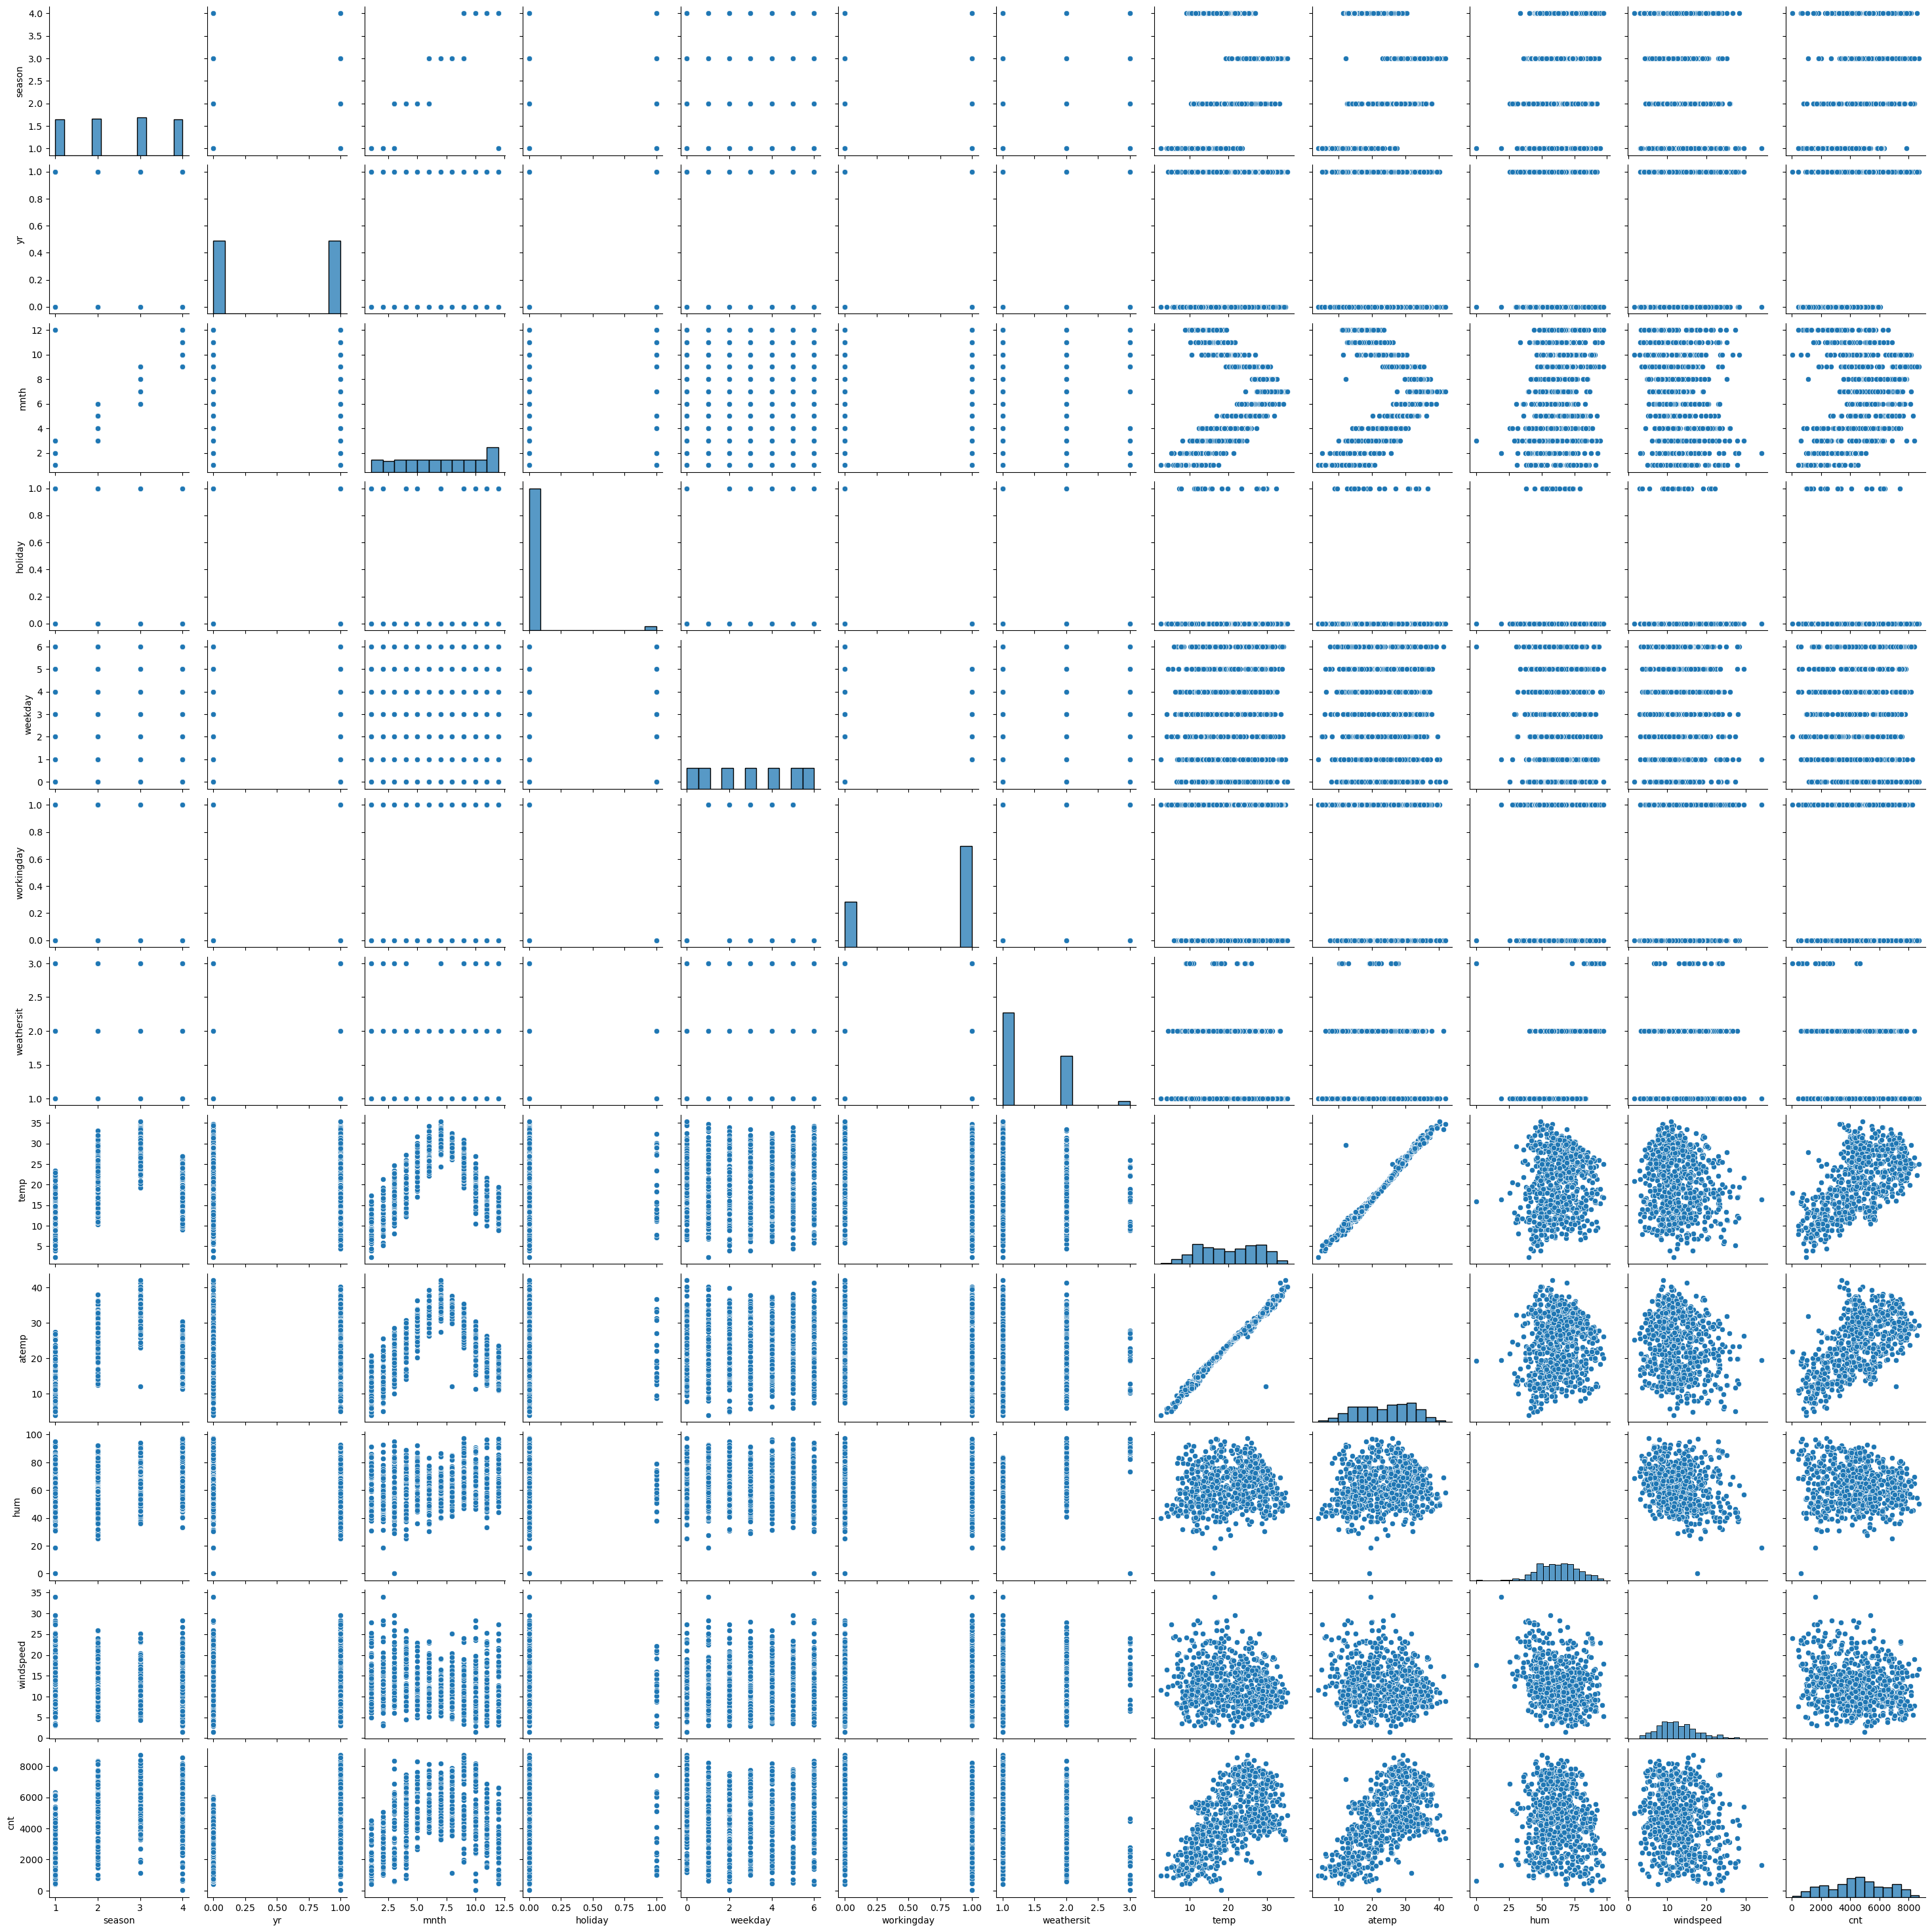

In [6]:
# Checking for the correlations using pair plot
sns.pairplot(data = bikes)

##### Here we can see that there are some categorical variables which are in squence that can actually affect the model

In [7]:
# Converting the int values of categorical columns to categorial "String" data type.
bikes1=bikes.copy()
bikes1['season'] = bikes1['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bikes1['mnth'] = bikes1['mnth'].map({1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'})
bikes1['weekday'] = bikes1['weekday'].map({0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'})
bikes1['weathersit'] = bikes1['weathersit'].map({1:'1', 2:'2', 3:'3', 4:'4'})

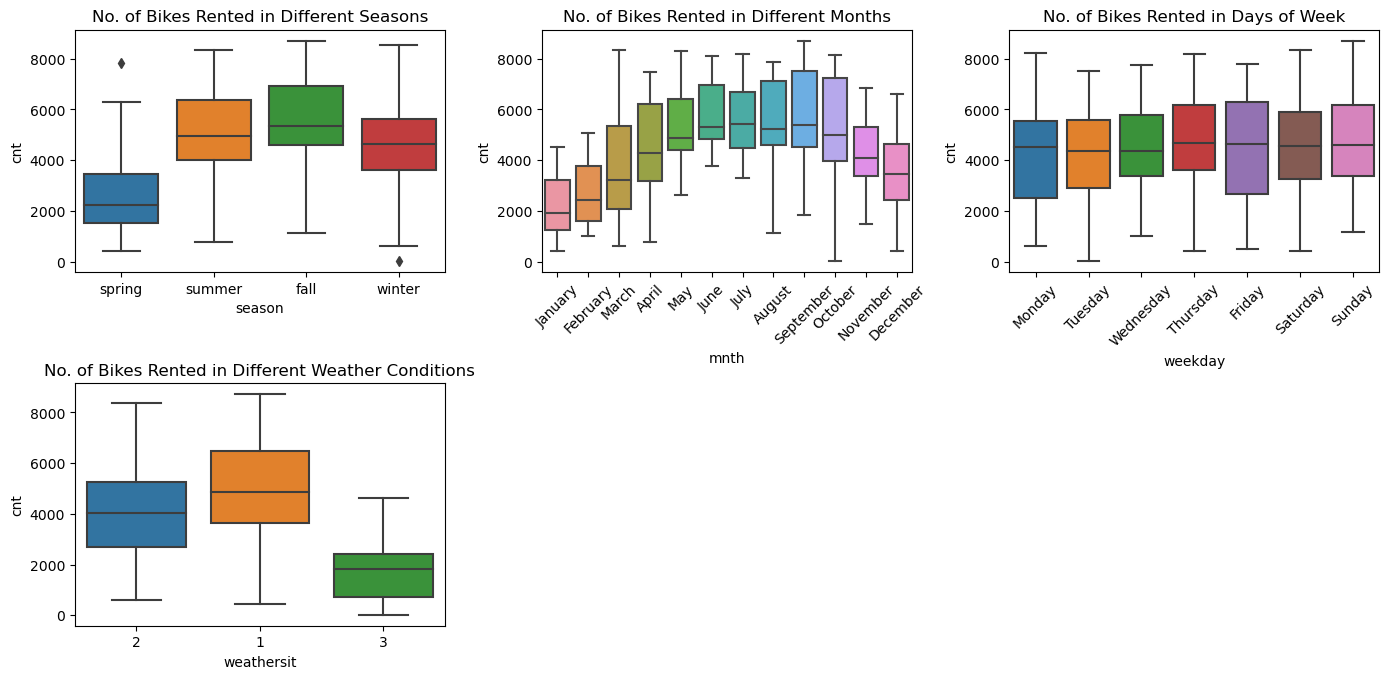

In [8]:
# Lets try to visualise this using pyplot
plt.figure(figsize=(14, 10))
plt.subplot(3,3,1)
sns.boxplot(x='season', y='cnt', data=bikes1)
plt.title('No. of Bikes Rented in Different Seasons')
plt.subplot(3,3,2)
sns.boxplot(x='mnth', y='cnt', data=bikes1)
plt.xticks(rotation=45)
plt.title('No. of Bikes Rented in Different Months')
plt.subplot(3,3,3)
sns.boxplot(x='weekday', y='cnt', data=bikes1)
plt.xticks(rotation=45)
plt.title('No. of Bikes Rented in Days of Week')
plt.subplot(3,3,4)
sns.boxplot(x='weathersit', y='cnt', data=bikes1)
plt.title('No. of Bikes Rented in Different Weather Conditions')
plt.tight_layout()
plt.show()

#### Conclusions:
- Rented Bikes vs Seasons:- There is a slight relation. Spring has the lowest number of bikes rented followed by winter.
- Rented Bikes vs Months:- Good relation can be seen here. There is a surge in the no. of rented bikes from March till October. Less no. of bikes were rented in starting and end of the year.
- Rented Bikes vs Days of Week:- Not much strong inference was seen here.
- Rented Bikes vs Weather:- Less no. of bikes were rented during the light snow (3) and light rain (2) weather conditions which is obvious.

In [9]:
# Checking the relation between the numerical columns using pair plot
sns.pairplot(data=bikes1, x_vars=['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed'], y_vars=['cnt'])

In [10]:
# Plotting heatmap to see the numerical correlations
plt.figure(figsize=(15,6))
sns.heatmap(data=bikes1.corr(), annot=True, cmap='RdYlGn')


<AxesSubplot:>

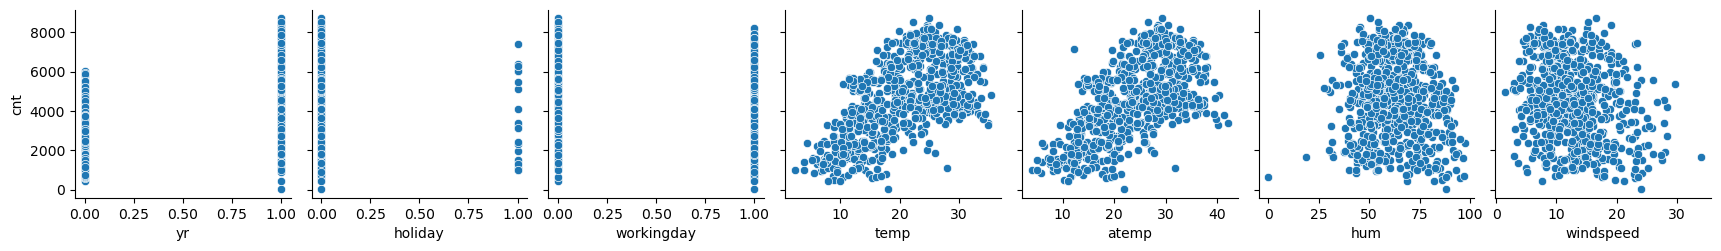

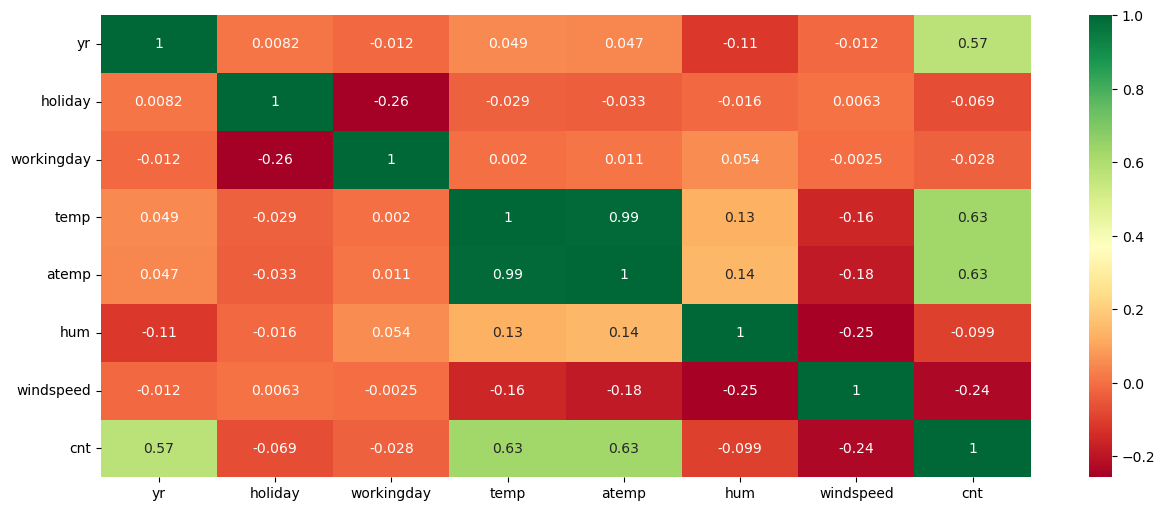

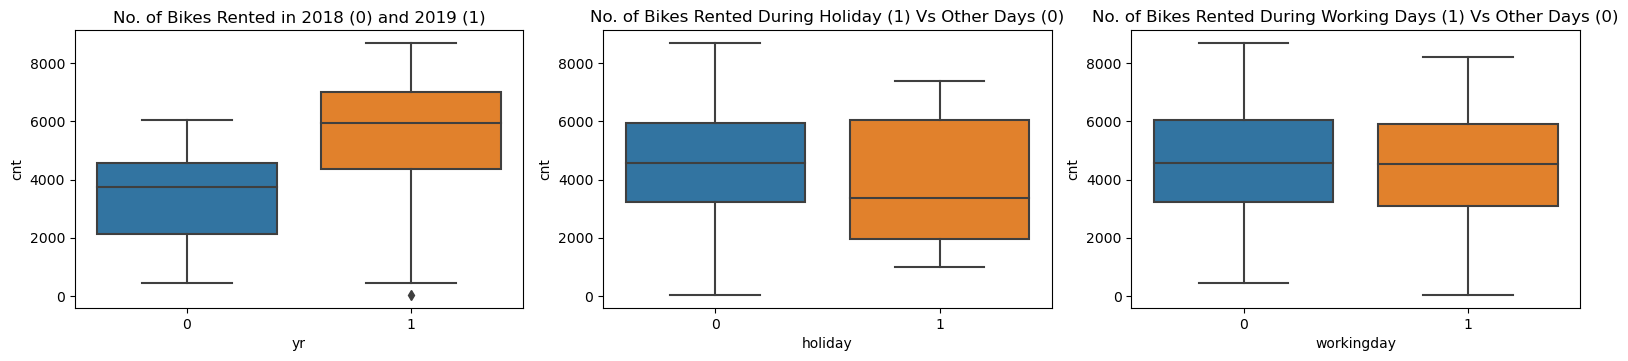

In [11]:
# Checking the relation between binary categorical columns (i.e columns with 0 and 1)
plt.figure(figsize=(16,10))
plt.subplot(3,3,1)
sns.boxplot(x='yr', y='cnt', data=bikes)
plt.title('No. of Bikes Rented in 2018 (0) and 2019 (1)')
plt.subplot(3,3,2)
sns.boxplot(x='holiday', y='cnt', data=bikes)
plt.title('No. of Bikes Rented During Holiday (1) Vs Other Days (0)')
plt.subplot(3,3,3)
sns.boxplot(x='workingday', y='cnt', data=bikes)
plt.title('No. of Bikes Rented During Working Days (1) Vs Other Days (0)')
plt.tight_layout()
plt.show()


In [12]:
# Due to high correlation between temp and atemp, dropping atemp.
bikes1.drop(columns=['atemp'], inplace=True)

In [13]:
# Creating a list of all the categorical columns
categorical = ['season', 'mnth', 'weekday', 'weathersit']

In [14]:
# Creating the dummy variables for multi-level categorical columns
dummy=pd.get_dummies(bikes1[['season', 'mnth', 'weekday', 'weathersit']], drop_first=True)
bikes1.drop(columns=categorical, inplace=True)
bikes1.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt
0,0,0,1,14.110847,80.5833,10.749882,985
1,0,0,1,14.902598,69.6087,16.652113,801
2,0,0,1,8.050924,43.7273,16.636703,1349
3,0,0,1,8.200000,59.0435,10.739832,1562
4,0,0,1,9.305237,43.6957,12.522300,1600


In [15]:
# Finalizing the dataframe
bikes1=pd.concat([bikes1, dummy], axis=1)
bikes1.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_2,weathersit_3
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### 4. Data Preparation

In [16]:
# Creating the train and test datasets for building model
# Splitting the dataset to train and test - (70, 30) split
bikes1_train, bikes1_test = train_test_split(bikes1, train_size=0.7, test_size=0.3, random_state=100)

In [17]:
# Scaling both the train and test data using Min Max Scaling method. Will be applied on continous numerical variables.
scaler = MinMaxScaler()
bikes1_train[['temp', 'hum', 'windspeed', 'cnt']]=scaler.fit_transform(bikes1_train[['temp', 'hum', 'windspeed', 'cnt']])
bikes1_test[['temp', 'hum', 'windspeed', 'cnt']]=scaler.transform(bikes1_test[['temp', 'hum', 'windspeed', 'cnt']])

In [18]:
# Describing the train data
bikes1_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
yr,510.0,0.507843,0.500429,0.0,0.000000,1.000000,1.000000,1.0
holiday,510.0,0.025490,0.157763,0.0,0.000000,0.000000,0.000000,1.0
workingday,510.0,0.711765,0.453386,0.0,0.000000,1.000000,1.000000,1.0
temp,510.0,0.537262,0.225844,0.0,0.339853,0.540519,0.735215,1.0
hum,510.0,0.650369,0.145882,0.0,0.538643,0.653714,0.754830,1.0
windspeed,510.0,0.320768,0.169797,0.0,0.199179,0.296763,0.414447,1.0
cnt,510.0,0.513620,0.224593,0.0,0.356420,0.518638,0.684710,1.0
season_spring,510.0,0.243137,0.429398,0.0,0.000000,0.000000,0.000000,1.0
season_summer,510.0,0.245098,0.430568,0.0,0.000000,0.000000,0.000000,1.0
season_winter,510.0,0.249020,0.432870,0.0,0.000000,0.000000,0.000000,1.0


In [19]:
# Describing the test data
bikes1_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
yr,219.0,0.479452,0.500722,0.000000,0.000000,0.000000,1.000000,1.000000
holiday,219.0,0.036530,0.188034,0.000000,0.000000,0.000000,0.000000,1.000000
workingday,219.0,0.639269,0.481313,0.000000,0.000000,1.000000,1.000000,1.000000
temp,219.0,0.558941,0.233698,0.046591,0.354650,0.558691,0.759096,0.984424
hum,219.0,0.638508,0.148974,0.261915,0.527265,0.627737,0.743928,1.002146
windspeed,219.0,0.313350,0.159947,-0.042808,0.198517,0.299459,0.403048,0.807474
cnt,219.0,0.520592,0.218435,0.048205,0.377531,0.524275,0.672745,0.963300
season_spring,219.0,0.255708,0.437258,0.000000,0.000000,0.000000,1.000000,1.000000
season_summer,219.0,0.264840,0.442259,0.000000,0.000000,0.000000,1.000000,1.000000
season_winter,219.0,0.232877,0.423633,0.000000,0.000000,0.000000,0.000000,1.000000


In [20]:
# Assigning the X_train, y_train and X_test, y_test
y_train = bikes1_train.pop('cnt') 
X_train = bikes1_train
y_test = bikes1_test.pop('cnt') 
X_test = bikes1_test

### 5. Building the Model

In [21]:
# Automating the variabele selection process using RFE
# Selecting the top 16 / 28 variables using RFE
lm = LinearRegression()
rfe=RFE(estimator=lm, n_features_to_select=16)
rfe.fit(X_train, y_train)
top_rfe_var=pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
top_rfe_var.columns=['Features','Choosen','Ranking']
top_rfe_var=top_rfe_var.sort_values(by='Ranking').reset_index(drop=True)
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]

In [22]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


We will start the statistical analysis of each model that we will generate now

> Model 1

In [23]:
# Statistical Analysis
# Adding the constant that represent the intercept of the linear regression line.
X_train_rfe_cst = sm.add_constant(X_train_rfe)
# Fitting the regression line
lm=sm.OLS(y_train, X_train_rfe_cst).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     169.7
Date:                Thu, 09 Nov 2023   Prob (F-statistic):          1.15e-188
Time:                        19:47:36   Log-Likelihood:                 516.15
No. Observations:                 510   AIC:                            -998.3
Df Residuals:                     493   BIC:                            -926.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3320      0.037      9.056      0.000       0.260       0.404
yr                 0.2307      0.008     28.597      0.000       0.215       0.247
holiday           -0.0887      0.026     -3.469      0.001      -0.139      -0.038
temp               0.4639      0.038     12.156      0.000       0.389       0.539
hum               -0.1581      0.038     -4.189      0.000      -0.232      -0.084
windspeed         -0.1897      0.026     -7.369      0.000      -0.240      -0.139
season_spring     -0.0518      0.022     -2.353      0.019      -0.095      -0.009
season_summer      0.0374      0.015      2.425      0.016       0.007       0.068
season_winter      0.1016      0.018      5.662      0.000       0.066       0.137
mnth_December     -0.0465      0.018     -2.541      0.011      -0.082      -0.011
mnth_February     -0.0361      0.022     -1.667      0.096      -0.079       0.006
mnth_January      -0.0631      0.021     -2.936      0.003      -0.105      -0.021
mnth_July         -0.0545      0.018     -2.995      0.003      -0.090      -0.019
mnth_November     -0.0458      0.019     -2.421      0.016      -0.083      -0.009
mnth_September     0.0734      0.017      4.349      0.000       0.040       0.107
weathersit_2      -0.0562      0.010     -5.375      0.000      -0.077      -0.036
weathersit_3      -0.2495      0.026     -9.468      0.000      -0.301      -0.198
==============================================================================
Omnibus:                       71.849   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.456
Skew:                          -0.726   Prob(JB):                     4.82e-39
Kurtosis:                       5.489   Cond. No.                         21.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
# Multicollinearity check using VIF module
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe, i) for i in range(0,len(X_train_rfe.columns))]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
3,hum,31.58
2,temp,18.34
5,season_spring,5.45
4,windspeed,4.73
7,season_winter,4.06
6,season_summer,2.81
10,mnth_January,2.38
14,weathersit_2,2.32
0,yr,2.09
9,mnth_February,1.92


mnth_February has very high p-value i.e 0.096 so will be dropped. Let's see if the VIF of other features will decrease or not after dropping.

> Model 2 ('mnth_February' Dropped)

In [25]:
# Dropping the column mnth_February
X_train_rfe=X_train_rfe.drop(columns=['mnth_February'])
X_train_rfe.shape
# Adding the constant that represent the intercept of the linear regression line.
X_train_rfe_cst = sm.add_constant(X_train_rfe)
# Fitting the regression line
lm=sm.OLS(y_train, X_train_rfe_cst).fit()
# Getting the statistical summary of the linear regression
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Thu, 09 Nov 2023   Prob (F-statistic):          3.34e-189
Time:                        19:47:37   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3202      0.036      8.886      0.000       0.249       0.391
yr                 0.2303      0.008     28.511      0.000       0.214       0.246
holiday           -0.0912      0.026     -3.566      0.000      -0.141      -0.041
temp               0.4800      0.037     12.977      0.000       0.407       0.553
hum               -0.1602      0.038     -4.240      0.000      -0.234      -0.086
windspeed         -0.1885      0.026     -7.312      0.000      -0.239      -0.138
season_spring     -0.0617      0.021     -2.907      0.004      -0.103      -0.020
season_summer      0.0408      0.015      2.659      0.008       0.011       0.071
season_winter      0.1034      0.018      5.763      0.000       0.068       0.139
mnth_December     -0.0372      0.017     -2.131      0.034      -0.071      -0.003
mnth_January      -0.0437      0.018     -2.415      0.016      -0.079      -0.008
mnth_July         -0.0555      0.018     -3.046      0.002      -0.091      -0.020
mnth_November     -0.0409      0.019     -2.187      0.029      -0.078      -0.004
mnth_September     0.0749      0.017      4.438      0.000       0.042       0.108
weathersit_2      -0.0559      0.010     -5.338      0.000      -0.076      -0.035
weathersit_3      -0.2481      0.026     -9.402      0.000      -0.300      -0.196
==============================================================================
Omnibus:                       67.327   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.896
Skew:                          -0.684   Prob(JB):                     1.56e-36
Kurtosis:                       5.427   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
# Multicollinearity check using VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe, i) for i in range(0,len(X_train_rfe.columns))]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
3,hum,30.94
2,temp,17.80
4,windspeed,4.72
5,season_spring,4.37
7,season_winter,4.06
6,season_summer,2.81
13,weathersit_2,2.32
0,yr,2.09
11,mnth_November,1.83
9,mnth_January,1.75


Humidity (hum) has VIF of 30.94 which is very high i.e >5. So it will be dropped.

> Model 3 ('hum' Dropped)

In [27]:
# Dropping the column 'hum' (Humidity)
X_train_rfe=X_train_rfe.drop(columns=['hum'])
# Checking the shape after dropping
X_train_rfe.shape
# Adding the constant that represent the intercept of the linear regression line.
X_train_rfe_cst = sm.add_constant(X_train_rfe)
# Fitting the regression line
lm=sm.OLS(y_train, X_train_rfe_cst).fit()
# Getting the statistical summary of the linear regression
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Thu, 09 Nov 2023   Prob (F-statistic):          1.57e-186
Time:                        19:47:37   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2466      0.032      7.679      0.000       0.184       0.310
yr                 0.2343      0.008     28.709      0.000       0.218       0.250
holiday           -0.0919      0.026     -3.533      0.000      -0.143      -0.041
temp               0.4377      0.036     12.083      0.000       0.366       0.509
windspeed         -0.1586      0.025     -6.290      0.000      -0.208      -0.109
season_spring     -0.0716      0.021     -3.337      0.001      -0.114      -0.029
season_summer      0.0333      0.015      2.148      0.032       0.003       0.064
season_winter      0.0887      0.018      4.951      0.000       0.053       0.124
mnth_December     -0.0445      0.018     -2.520      0.012      -0.079      -0.010
mnth_January      -0.0503      0.018     -2.738      0.006      -0.086      -0.014
mnth_July         -0.0504      0.018     -2.725      0.007      -0.087      -0.014
mnth_November     -0.0419      0.019     -2.198      0.028      -0.079      -0.004
mnth_September     0.0682      0.017      3.992      0.000       0.035       0.102
weathersit_2      -0.0814      0.009     -9.359      0.000      -0.099      -0.064
weathersit_3      -0.2929      0.025    -11.908      0.000      -0.341      -0.245
==============================================================================
Omnibus:                       70.031   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.566
Skew:                          -0.702   Prob(JB):                     7.52e-39
Kurtosis:                       5.508   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
# Multicollinearity check using VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe, i) for i in range(0,len(X_train_rfe.columns))]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,season_winter,2.94
4,season_spring,2.89
5,season_summer,2.23
0,yr,2.07
10,mnth_November,1.80
8,mnth_January,1.66
9,mnth_July,1.59
12,weathersit_2,1.56


Though temp has VIF > 5, we will try to retain that as it has very good correlation with the 'cnt' column. Thus, we'll try to reduce it's VIF by dropping other columns that has high p-values.
Dropping the 'season_summer' column with p-value = 0.032 and let's see the decrease in temp VIF.

> Model 4 ('season_summer' Dropped)

In [29]:
# Dropping the column season_summer
X_train_rfe=X_train_rfe.drop(columns=['season_summer'])
# Checking the shape after dropping
X_train_rfe.shape
# Adding the constant that represent the intercept of the linear regression line.
X_train_rfe_cst = sm.add_constant(X_train_rfe)
# Fitting the regression line
lm=sm.OLS(y_train, X_train_rfe_cst).fit()
# Getting the statistical summary of the linear regression
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.9
Date:                Thu, 09 Nov 2023   Prob (F-statistic):          1.08e-186
Time:                        19:47:37   Log-Likelihood:                 503.24
No. Observations:                 510   AIC:                            -978.5
Df Residuals:                     496   BIC:                            -919.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2893      0.025     11.427      0.000       0.240       0.339
yr                 0.2348      0.008     28.679      0.000       0.219       0.251
holiday           -0.0913      0.026     -3.496      0.001      -0.143      -0.040
temp               0.4026      0.032     12.407      0.000       0.339       0.466
windspeed         -0.1540      0.025     -6.108      0.000      -0.204      -0.104
season_spring     -0.1034      0.016     -6.613      0.000      -0.134      -0.073
season_winter      0.0650      0.014      4.588      0.000       0.037       0.093
mnth_December     -0.0510      0.017     -2.918      0.004      -0.085      -0.017
mnth_January      -0.0556      0.018     -3.047      0.002      -0.091      -0.020
mnth_July         -0.0643      0.017     -3.705      0.000      -0.098      -0.030
mnth_November     -0.0488      0.019     -2.593      0.010      -0.086      -0.012
mnth_September     0.0537      0.016      3.409      0.001       0.023       0.085
weathersit_2      -0.0812      0.009     -9.297      0.000      -0.098      -0.064
weathersit_3      -0.2949      0.025    -11.954      0.000      -0.343      -0.246
==============================================================================
Omnibus:                       70.900   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.224
Skew:                          -0.695   Prob(JB):                     3.65e-41
Kurtosis:                       5.614   Cond. No.                         15.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
# Multicollinearity check using VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe, i) for i in range(0,len(X_train_rfe.columns))]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
2,temp,4.67
3,windspeed,4.05
5,season_winter,2.54
4,season_spring,2.36
0,yr,2.06
9,mnth_November,1.80
7,mnth_January,1.65
11,weathersit_2,1.53
6,mnth_December,1.46
8,mnth_July,1.36


Now, we can see that the VIF of temp is <5. We shall still reduce it be dropping other columns with high p-values.
Dropping the 'mnth_November' column with p-value = 0.010 and let's see the decrease in temp VIF.
> Model 5 ('mnth_November' Dropped)

In [31]:
# Dropping the column mnth_November
X_train_rfe=X_train_rfe.drop(columns=['mnth_November'])
# Checking the shape after dropping
X_train_rfe.shape
# Adding the constant that represent the intercept of the linear regression line.
X_train_rfe_cst = sm.add_constant(X_train_rfe)
# Fitting the regression line
lm=sm.OLS(y_train, X_train_rfe_cst).fit()
# Getting the statistical summary of the linear regression
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.4
Date:                Thu, 09 Nov 2023   Prob (F-statistic):          2.02e-186
Time:                        19:47:37   Log-Likelihood:                 499.81
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     497   BIC:                            -918.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2769      0.025     11.074      0.000       0.228       0.326
yr                 0.2348      0.008     28.510      0.000       0.219       0.251
holiday           -0.0994      0.026     -3.812      0.000      -0.151      -0.048
temp               0.4200      0.032     13.153      0.000       0.357       0.483
windspeed         -0.1542      0.025     -6.079      0.000      -0.204      -0.104
season_spring     -0.0997      0.016     -6.369      0.000      -0.130      -0.069
season_winter      0.0482      0.013      3.804      0.000       0.023       0.073
mnth_December     -0.0340      0.016     -2.086      0.037      -0.066      -0.002
mnth_January      -0.0506      0.018     -2.769      0.006      -0.086      -0.015
mnth_July         -0.0671      0.017     -3.849      0.000      -0.101      -0.033
mnth_September     0.0575      0.016      3.649      0.000       0.027       0.088
weathersit_2      -0.0802      0.009     -9.144      0.000      -0.097      -0.063
weathersit_3      -0.2904      0.025    -11.735      0.000      -0.339      -0.242
==============================================================================
Omnibus:                       62.888   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.760
Skew:                          -0.643   Prob(JB):                     6.74e-34
Kurtosis:                       5.353   Cond. No.                         14.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
# Multicollinearity check using VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe, i) for i in range(0,len(X_train_rfe.columns))]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
2,temp,4.63
3,windspeed,4.00
4,season_spring,2.36
0,yr,2.06
5,season_winter,1.64
7,mnth_January,1.64
10,weathersit_2,1.53
8,mnth_July,1.36
6,mnth_December,1.29
9,mnth_September,1.20


Now, there wasn't drastic change in the VIF value of the 'temp' column.
Let's drop 'mnth_December' as it has high p-value. Let's make the model more stable.
> Model 6 ('mnth_December' Dropped)

In [33]:
# Dropping the column mnth_December
X_train_rfe=X_train_rfe.drop(columns=['mnth_December'])
# Checking the shape after dropping
X_train_rfe.shape
# Adding the constant that represent the intercept of the linear regression line.
X_train_rfe_cst = sm.add_constant(X_train_rfe)
# Fitting the regression line
lm=sm.OLS(y_train, X_train_rfe_cst).fit()
# Getting the statistical summary of the linear regression
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.7
Date:                Thu, 09 Nov 2023   Prob (F-statistic):          1.13e-186
Time:                        19:47:37   Log-Likelihood:                 497.58
No. Observations:                 510   AIC:                            -971.2
Df Residuals:                     498   BIC:                            -920.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2657      0.025     10.843      0.000       0.218       0.314
yr                 0.2348      0.008     28.426      0.000       0.219       0.251
holiday           -0.0977      0.026     -3.738      0.000      -0.149      -0.046
temp               0.4335      0.031     13.817      0.000       0.372       0.495
windspeed         -0.1482      0.025     -5.863      0.000      -0.198      -0.099
season_spring     -0.1013      0.016     -6.459      0.000      -0.132      -0.071
season_winter      0.0432      0.012      3.462      0.001       0.019       0.068
mnth_January      -0.0427      0.018     -2.382      0.018      -0.078      -0.007
mnth_July         -0.0693      0.017     -3.967      0.000      -0.104      -0.035
mnth_September     0.0587      0.016      3.710      0.000       0.028       0.090
weathersit_2      -0.0802      0.009     -9.106      0.000      -0.097      -0.063
weathersit_3      -0.2877      0.025    -11.601      0.000      -0.336      -0.239
==============================================================================
Omnibus:                       58.998   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.235
Skew:                          -0.614   Prob(JB):                     5.83e-31
Kurtosis:                       5.246   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
# Multicollinearity check using VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe, i) for i in range(0,len(X_train_rfe.columns))]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
2,temp,4.63
3,windspeed,4.00
4,season_spring,2.25
0,yr,2.06
6,mnth_January,1.60
9,weathersit_2,1.53
5,season_winter,1.40
7,mnth_July,1.36
8,mnth_September,1.20
10,weathersit_3,1.08


Let's drop 'mnth_January' as it has high p-value. Let's make the model more stable.
> Model 7 ('mnth_January' Dropped)

In [35]:
# Dropping the column mnth_January
X_train_rfe=X_train_rfe.drop(columns=['mnth_January'])
# Checking the shape after dropping
X_train_rfe.shape
# Adding the constant that represent the intercept of the linear regression line.
X_train_rfe_cst = sm.add_constant(X_train_rfe)
# Fitting the regression line
lm=sm.OLS(y_train, X_train_rfe_cst).fit()
# Getting the statistical summary of the linear regression
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.7
Date:                Thu, 09 Nov 2023   Prob (F-statistic):          1.16e-186
Time:                        19:47:37   Log-Likelihood:                 494.70
No. Observations:                 510   AIC:                            -967.4
Df Residuals:                     499   BIC:                            -920.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2519      0.024     10.530      0.000       0.205       0.299
yr                 0.2341      0.008     28.224      0.000       0.218       0.250
holiday           -0.0986      0.026     -3.752      0.000      -0.150      -0.047
temp               0.4515      0.031     14.758      0.000       0.391       0.512
windspeed         -0.1398      0.025     -5.559      0.000      -0.189      -0.090
season_spring     -0.1108      0.015     -7.265      0.000      -0.141      -0.081
season_winter      0.0473      0.012      3.804      0.000       0.023       0.072
mnth_July         -0.0727      0.017     -4.160      0.000      -0.107      -0.038
mnth_September     0.0577      0.016      3.635      0.000       0.027       0.089
weathersit_2      -0.0811      0.009     -9.182      0.000      -0.098      -0.064
weathersit_3      -0.2864      0.025    -11.499      0.000      -0.335      -0.237
==============================================================================
Omnibus:                       58.020   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.195
Skew:                          -0.601   Prob(JB):                     9.80e-31
Kurtosis:                       5.249   Cond. No.                         14.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
# Multicollinearity check using VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe, i) for i in range(0,len(X_train_rfe.columns))]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
2,temp,4.60
3,windspeed,4.00
0,yr,2.06
4,season_spring,1.65
8,weathersit_2,1.51
5,season_winter,1.40
6,mnth_July,1.35
7,mnth_September,1.20
9,weathersit_3,1.08
1,holiday,1.04


Now all the p-values are zero and the VIF's of the selected features are <5.
'temp' and 'windspeed' may be slighly correlated with each other. Let's drop windspeed and keep 'temp' as 'temp' has good correlation with the 'cnt' column.
> Model 8 ('windspeed' Dropped)

In [37]:
# Dropping the column windspeed
X_train_rfe=X_train_rfe.drop(columns=['windspeed'])
# Checking the shape after dropping
X_train_rfe.shape
# Adding the constant that represent the intercept of the linear regression line.
X_train_rfe_cst = sm.add_constant(X_train_rfe)
# Fitting the regression line
lm=sm.OLS(y_train, X_train_rfe_cst).fit()
# Getting the statistical summary of the linear regression
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.5
Date:                Thu, 09 Nov 2023   Prob (F-statistic):          2.16e-181
Time:                        19:47:37   Log-Likelihood:                 479.38
No. Observations:                 510   AIC:                            -938.8
Df Residuals:                     500   BIC:                            -896.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1938      0.022      8.750      0.000       0.150       0.237
yr                 0.2330      0.009     27.300      0.000       0.216       0.250
holiday           -0.1011      0.027     -3.740      0.000      -0.154      -0.048
temp               0.4712      0.031     15.063      0.000       0.410       0.533
season_spring     -0.1107      0.016     -7.051      0.000      -0.142      -0.080
season_winter      0.0558      0.013      4.393      0.000       0.031       0.081
mnth_July         -0.0688      0.018     -3.824      0.000      -0.104      -0.033
mnth_September     0.0658      0.016      4.042      0.000       0.034       0.098
weathersit_2      -0.0796      0.009     -8.752      0.000      -0.097      -0.062
weathersit_3      -0.3002      0.026    -11.768      0.000      -0.350      -0.250
==============================================================================
Omnibus:                       66.905   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              173.340
Skew:                          -0.661   Prob(JB):                     2.29e-38
Kurtosis:                       5.532   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
# Multicollinearity check using VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe, i) for i in range(0,len(X_train_rfe.columns))]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
2,temp,2.99
0,yr,2.05
7,weathersit_2,1.51
4,season_winter,1.33
5,mnth_July,1.33
3,season_spring,1.25
6,mnth_September,1.19
8,weathersit_3,1.06
1,holiday,1.04


We can see that the VIF of temp is 2.99 now which is good to go. This model looks more stable than the previous one as it has good R-square and low VIF.

Therefore, Model 8 is choosen.


### 6. Checking Reliability of Model

Basic prediction of training data

In [39]:
# Predicting the y_train values
y_train_pred = lm.predict(X_train_rfe_cst)

c:\Users\sudarshan\dev\ML\Miniconda3\envs\1stop_internship_project\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


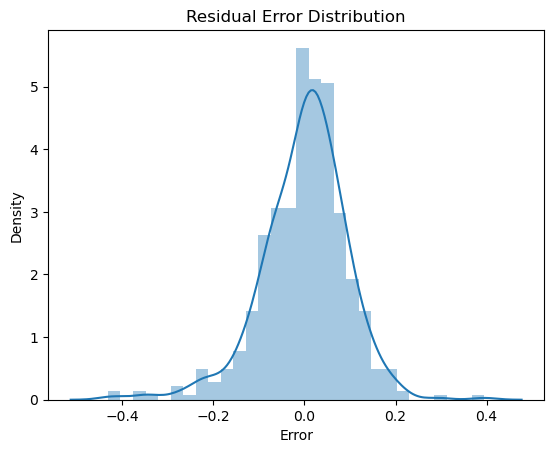

In [40]:
# Plotting the Residual Error Distribution
res = y_train - y_train_pred
sns.distplot(res)
plt.title('Residual Error Distribution')
plt.xlabel('Error')
plt.show();

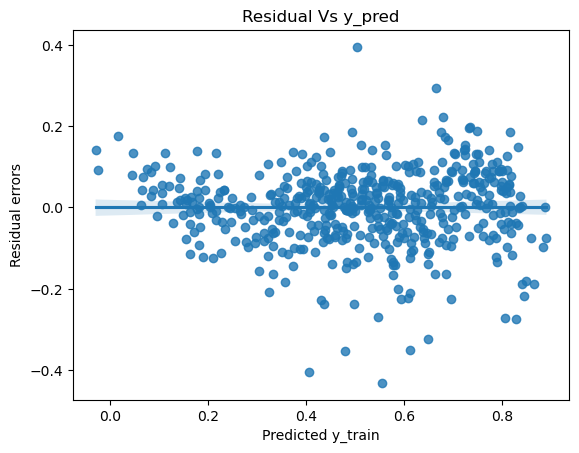

In [41]:
# Plotting the Residual Vs y_pred
sns.regplot(x=y_train_pred, y=res)
plt.title('Residual Vs y_pred')
plt.xlabel('Predicted y_train')
plt.ylabel('Residual errors')
plt.show();

Residuals are packed near to zero.
As the errors are normally distributed, this model satisfies the assumption.

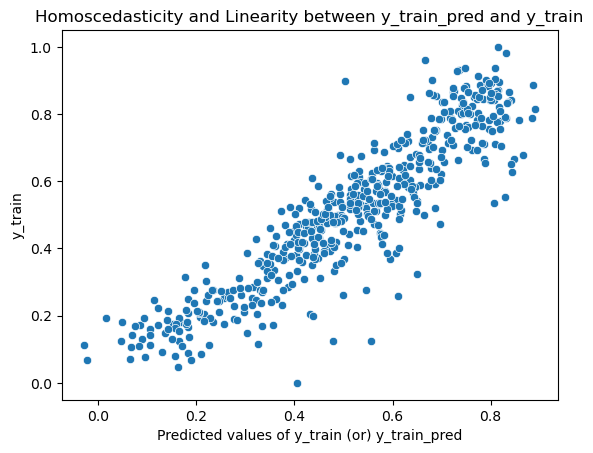

In [42]:
# Checking for Homoscedasticity and linearity between the y_train_pred and actual the y_train
sns.scatterplot(x=y_train_pred, y=y_train)
plt.title('Homoscedasticity and Linearity between y_train_pred and y_train')
plt.xlabel('Predicted values of y_train (or) y_train_pred')
plt.ylabel('y_train')
plt.show();

Residuals are having roughly the same variance across the range of predicted values, thus the model is homoscedastic.
Linearity of the graph is good. Hence, the model built is stable and reliable.

### 7. Model Testing

In [43]:
# Taking the columns from the previous model.
X_test_rfe = X_test[X_train_rfe.columns].reset_index(drop=True)

# Adding the constant that represent the intercept of the linear regression line.
X_test_rfe_cst = sm.add_constant(X_test_rfe)

In [44]:
# Predicting the y_test values
y_test_pred = lm.predict(X_test_rfe_cst)

Checking R2 score

In [45]:
# Finding the R-squared of the predicted test data (y_test_pred)
r2 = r2_score (y_true = y_test, y_pred = y_test_pred)
r2

0.8092200832884748

Let's check for the linearity of the predicted (y_test_pred) and actual (y_test)

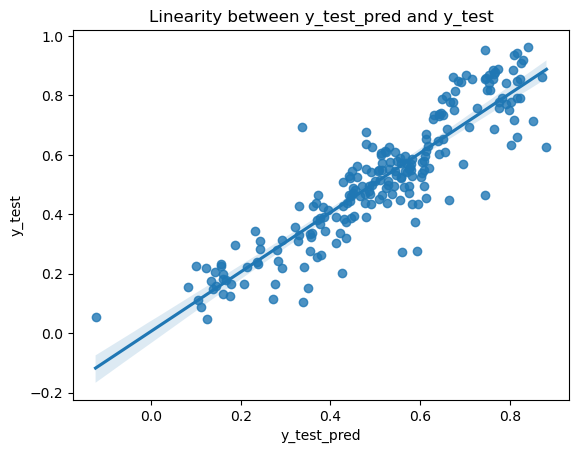

In [46]:
# Let's check for the linearity of the predicted (y_test_pred) and actual (y_test)
sns.regplot(x=y_test_pred, y=y_test)
plt.title('Linearity between y_test_pred and y_test')
plt.xlabel('y_test_pred')
plt.ylabel('y_test')
plt.show()

Lets check the top features that contribute to the prediction of this model

In [47]:
# Checking the parameters of the best fit line
lm.params.sort_values(ascending=False)

temp              0.471172
yr                0.233037
const             0.193838
mnth_September    0.065793
season_winter     0.055785
mnth_July        -0.068771
weathersit_2     -0.079572
holiday          -0.101113
season_spring    -0.110708
weathersit_3     -0.300245
dtype: float64

## This was the project to predict the demand of orders for the given bike sharing scenario/dataset